# Assignment for Adapt Ready

## 1. Data set reference link: https://www.consumerfinance.gov/data-research/consumer-complaints/#download-the-data
File data source: https://files.consumerfinance.gov/ccdb/complaints.csv.zip 
Problem statement:
Download the data from the file data source and provide possible data insights.


In [1]:
# Importing necessary libraries
import requests
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
# Download data and unzip
url = "https://files.consumerfinance.gov/ccdb/complaints.csv.zip"
response = requests.get(url)

with open("complaints.zip", "wb") as f:
    f.write(response.content)

with zipfile.ZipFile("complaints.zip", "r") as zip_ref:
    zip_ref.extractall()

In [3]:
# Load data
data = pd.read_csv("complaints.csv")

C:\Users\91879\AppData\Local\Temp\ipykernel_2716\1343316940.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("complaints.csv")


In [4]:
data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2024-01-24,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account information incorrect,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,33578,NaN,Consent not provided,Web,2024-01-24,Closed with explanation,Yes,NaN,8205544
1,2024-02-26,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company believes it acted appropriately as aut...,"CCS Financial Services, Inc.",NC,27536,NaN,Consent not provided,Web,2024-02-26,Closed with non-monetary relief,Yes,NaN,8423775
2,2024-01-26,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,"The companies, along with the credit reporting...",NaN,"EQUIFAX, INC.",NC,28804,NaN,Consent provided,Web,2024-01-26,Closed with non-monetary relief,Yes,NaN,8232435
3,2024-05-02,Credit card,Store credit card,Fees or interest,Unexpected increase in interest rate,NaN,NaN,"Colony Brands, Inc.",CA,93702,NaN,NaN,Web,2024-05-02,Closed with explanation,Yes,NaN,8902079
4,2024-01-26,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,In accordance with the Fair Credit Reporting a...,NaN,"EQUIFAX, INC.",GA,30213,NaN,Consent provided,Web,2024-01-26,Closed with explanation,Yes,NaN,8231458


In [5]:
print("Shape of the data: ",data.shape)

Shape of the data:  (5159721, 18)


In [6]:
# info about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5159721 entries, 0 to 5159720
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 708.

In [7]:
# statistics for numeric columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Complaint ID,5159721.0,5.146862e+06,2.407744e+06,1.0,3240587.0,5389155.0,7266528.0,8935236.0


In [8]:
# column-wise null values
null_values = data.isnull().sum().sort_values(ascending=False)

# Top 5 null values
null_values.head()

Tags                            4677247
Consumer disputed?              4391405
Consumer complaint narrative    3345316
Company public response         2687808
Consumer consent provided?      1024020
dtype: int64

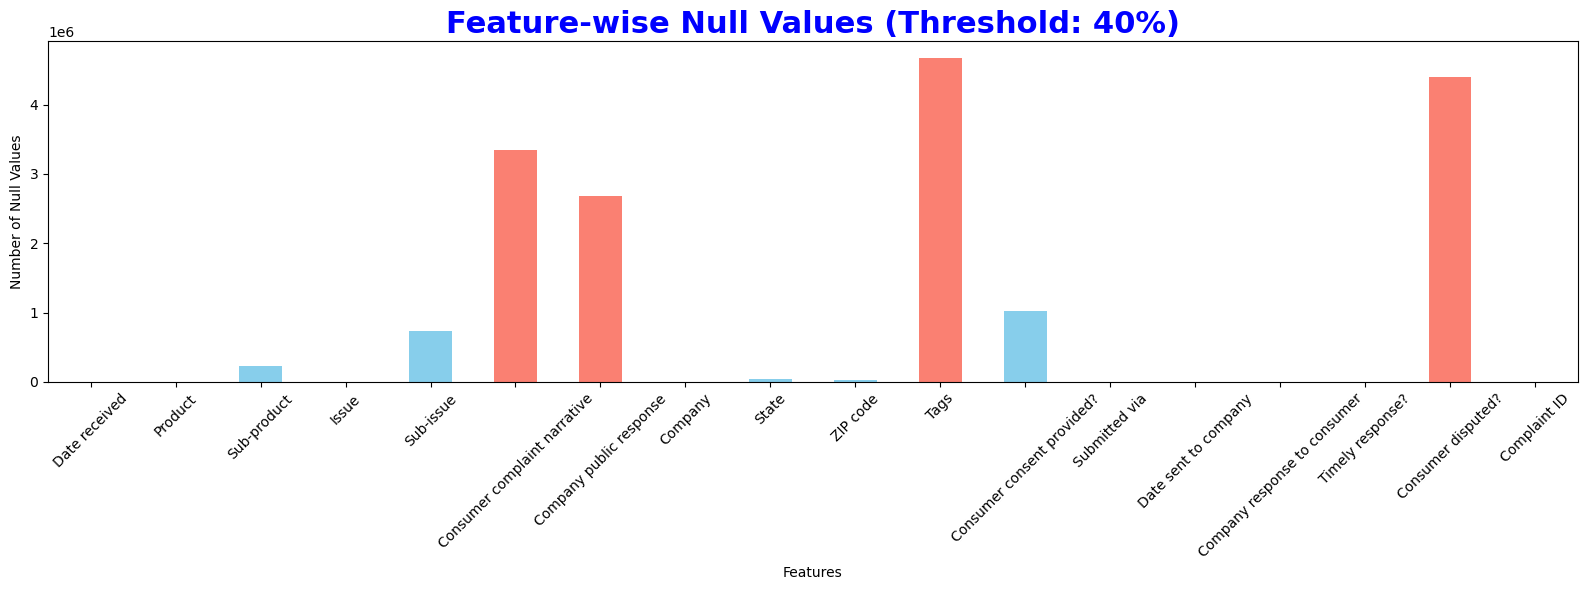

In [9]:
# threshold colour change for null values
threshold = 0.4 * len(data)

# column-wise null values
null_values = data.isnull().sum()

# Filter columns with null values exceeding the threshold
high_null_values = null_values[null_values > threshold]

# Plotting
plt.figure(figsize=(16, 6))
bar_colors = ['skyblue' if col not in high_null_values else 'salmon' for col in null_values.index]
null_values.plot(kind='bar', color=bar_colors)
plt.title('Feature-wise Null Values (Threshold: 40%)',fontsize=22, fontweight='bold', color='blue')
plt.xlabel('Features')
plt.ylabel('Number of Null Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
print(data.nunique())

Date received                      4539
Product                              21
Sub-product                          86
Issue                               178
Sub-issue                           272
Consumer complaint narrative    1478931
Company public response              11
Company                            7203
State                                63
ZIP code                          33630
Tags                                  3
Consumer consent provided?            4
Submitted via                         7
Date sent to company               4488
Company response to consumer          8
Timely response?                      2
Consumer disputed?                    2
Complaint ID                    5159721
dtype: int64


C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


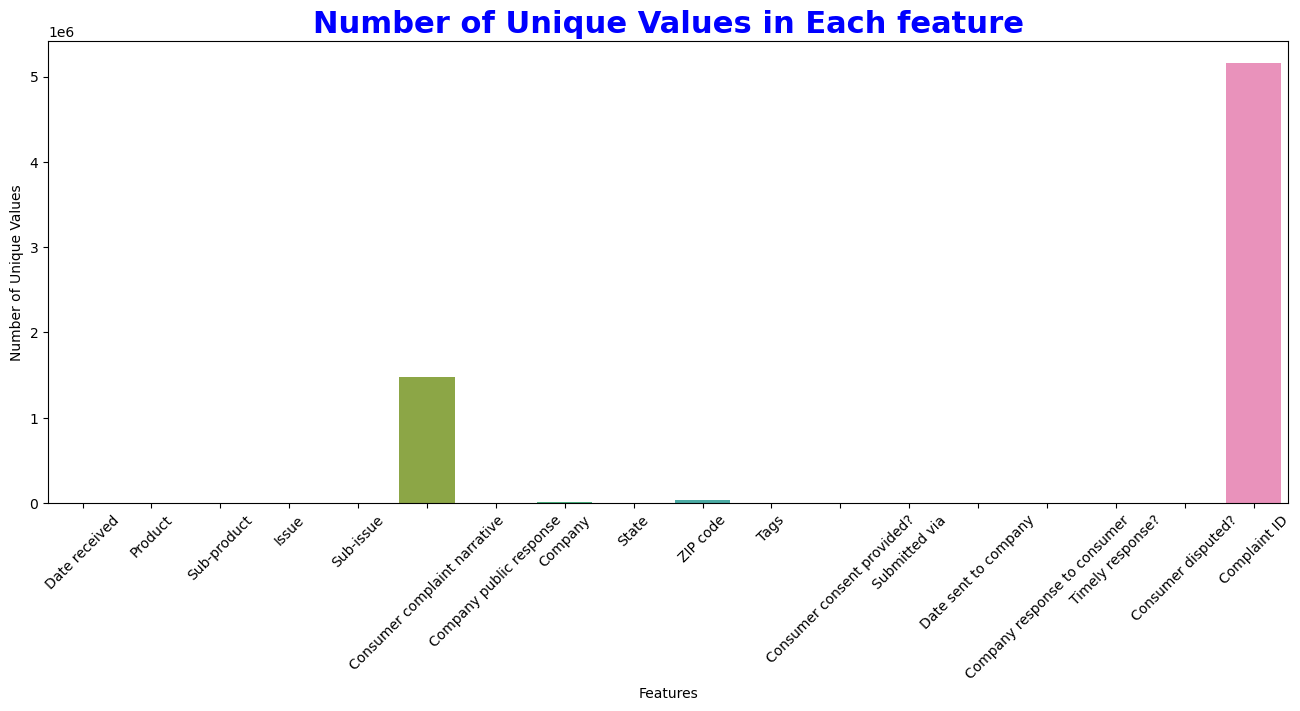

In [11]:
# unique values count
unique_values = data.nunique()

# Plot using Seaborn
plt.figure(figsize=(16, 6))
sns.barplot(x=unique_values.index, y=unique_values.values)
plt.title('Number of Unique Values in Each feature',fontsize=22, fontweight='bold', color='blue')
plt.xlabel('Features')
plt.ylabel('Number of Unique Values')
plt.xticks(rotation=45)
plt.show()

In [12]:
print("Total Number of complaints:", data.shape[0])

Total Number of complaints: 5159721


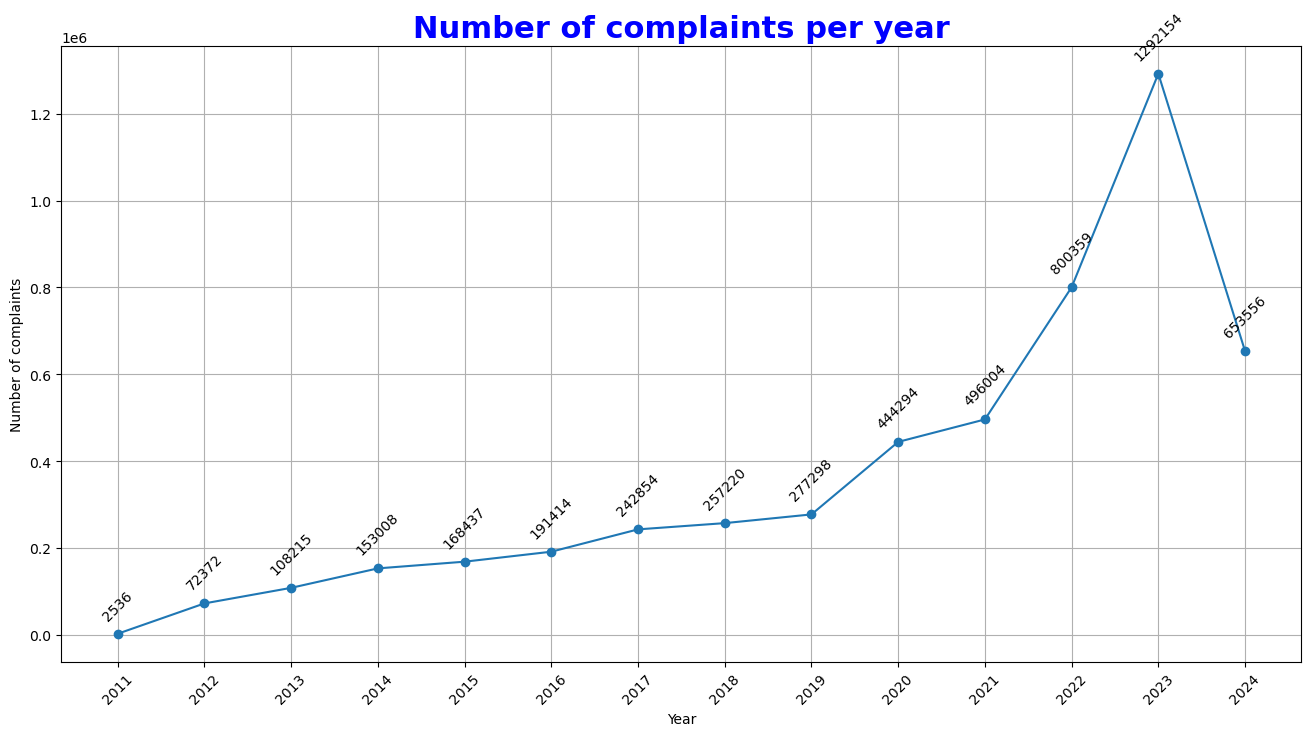

In [13]:
# Number of complaints per year

# Convert 'Date' column to datetime format
data['Date received'] = pd.to_datetime(data['Date received'])

# Extract year from the 'Date' column
data['Year'] = data['Date received'].dt.year

# Count complaints per year
n_complaints_per_year = data['Year'].value_counts().sort_index()

# Plot using Matplotlib
plt.figure(figsize=(16, 8))
plt.plot(n_complaints_per_year.index, n_complaints_per_year.values, marker='o', linestyle='-')
plt.title('Number of complaints per year', fontsize=22, fontweight='bold', color='blue')
plt.xlabel('Year')
plt.ylabel('Number of complaints')
plt.xticks(n_complaints_per_year.index, rotation=45)
plt.grid(True)
# Add values at data points
for i, txt in enumerate(n_complaints_per_year.values):
    plt.annotate(txt, (n_complaints_per_year.index[i], n_complaints_per_year.values[i]), textcoords="offset points", xytext=(0,10), ha='center', rotation=45)

plt.show()

Unique product categories: 21


C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


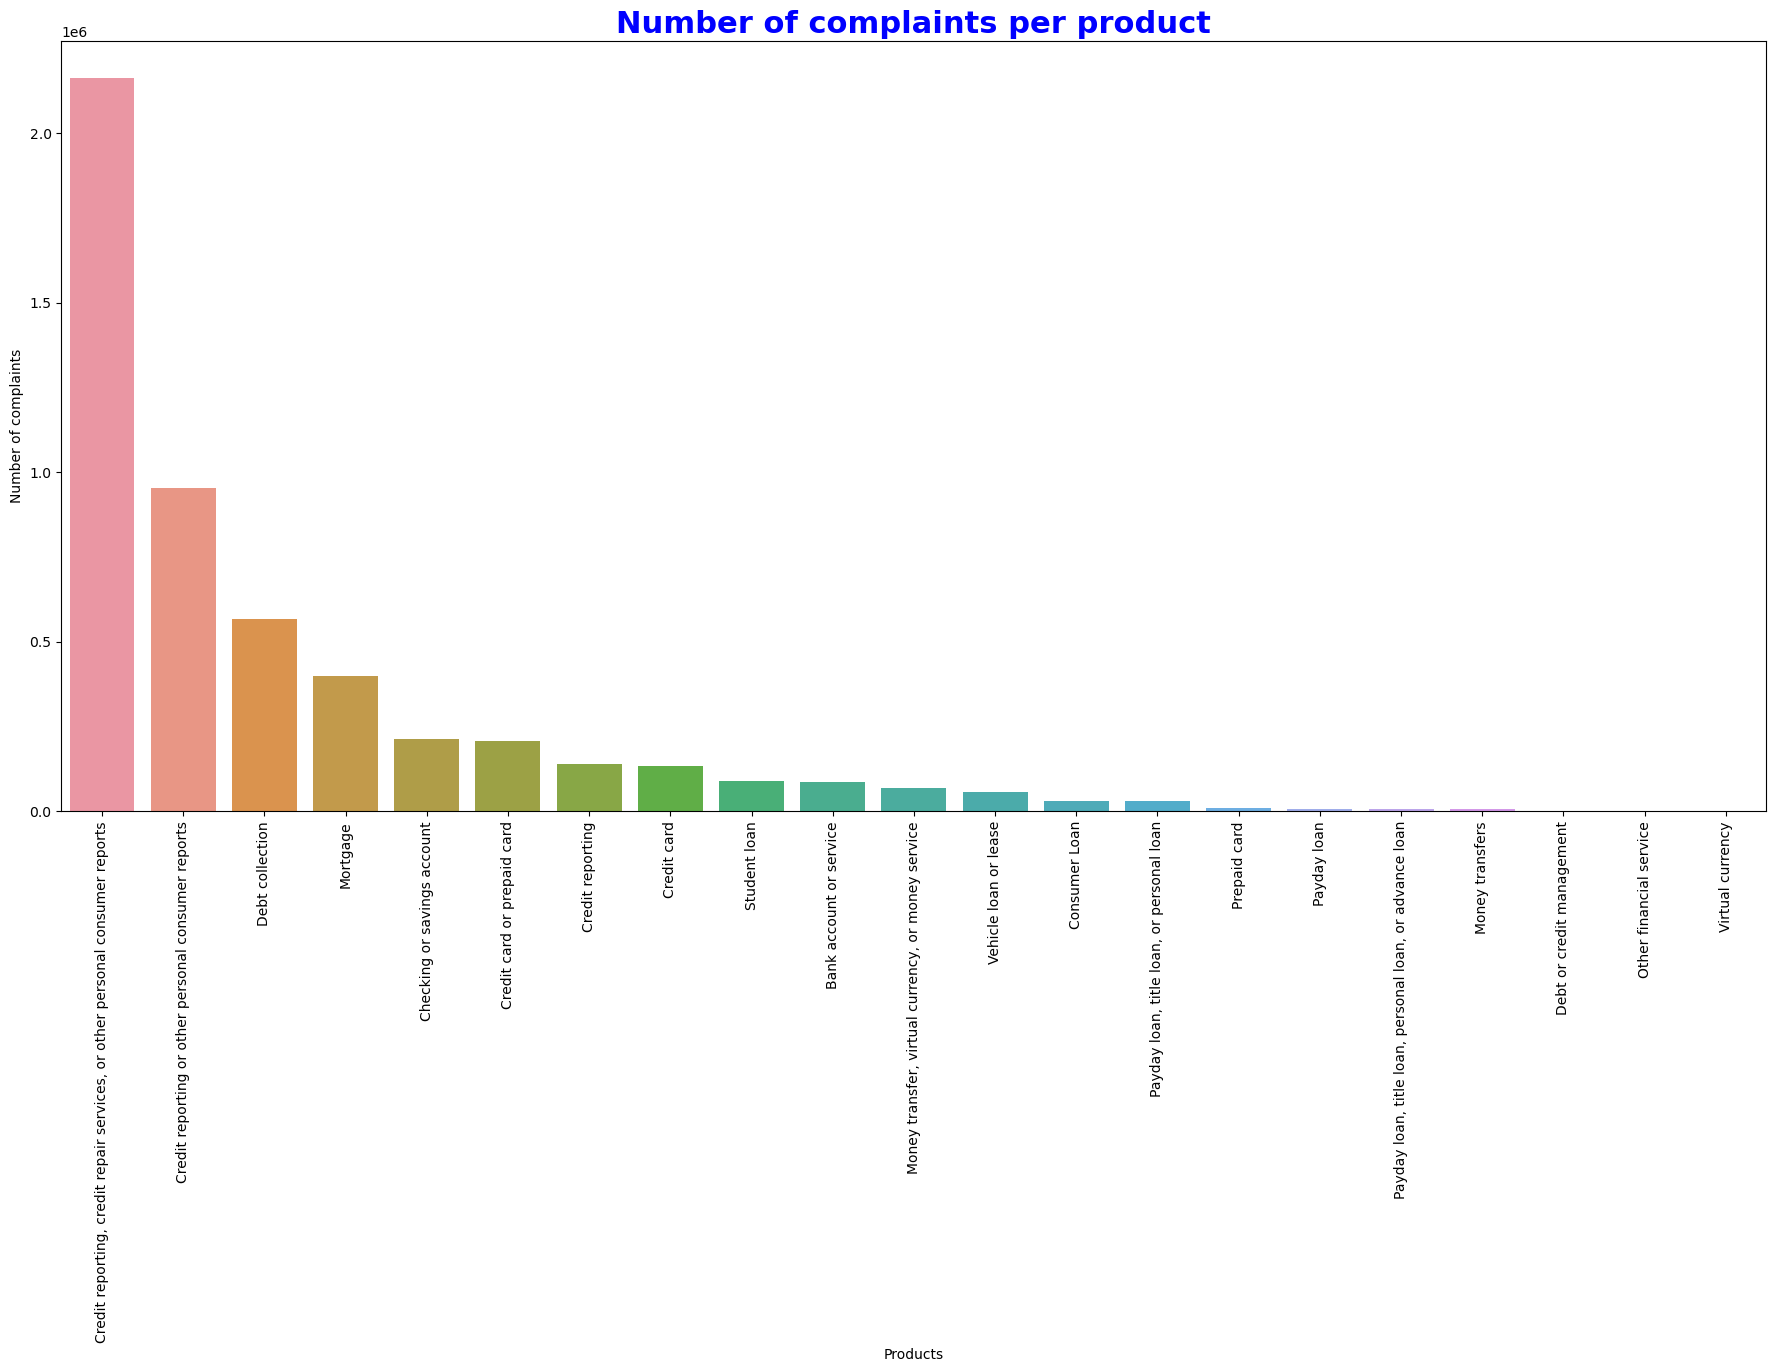

In [15]:
# Number of complaints per product

print("Unique product categories:", data["Product"].nunique())

n_complaints_per_product = data['Product'].value_counts()

# Plot using seaborn
plt.figure(figsize=(22, 10))
sns.barplot(x=n_complaints_per_product.index, y=n_complaints_per_product.values)
plt.title('Number of complaints per product', fontsize=22, fontweight='bold', color='blue')
plt.xlabel('Products')
plt.ylabel('Number of complaints')
plt.xticks(rotation=90)
plt.show()

In [16]:
# Number of complaints per Sub-product

print("Unique Sub-product categories:", data["Sub-product"].nunique())

n_complaints_per_product = df['Sub-product'].value_counts()

# Plot using seaborn
plt.figure(figsize=(22, 10))
sns.barplot(x=n_complaints_per_product.index, y=n_complaints_per_product.values)
plt.title('Number of complaints per Sub-product', fontsize=22, fontweight='bold', color='blue')
plt.xlabel('Sub-product')
plt.ylabel('Number of complaints')
plt.xticks(rotation=90)
plt.show()

Unique Sub-product categories: 86


NameError: name 'df' is not defined

In [ ]:
#  Highlighted the top Issues
# Count occurrences of each issue
issue_counts = data['Issue'].value_counts()

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white')

# Create a dictionary with issue as key and count as value
wordcloud_dict = {}
for issue, count in issue_counts.items():
    wordcloud_dict[issue] = count

# Generate the word cloud
wordcloud.generate_from_frequencies(wordcloud_dict)

# Plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Issues', fontsize=22, fontweight='bold', color='blue')
plt.axis('off')
plt.show()

In [ ]:
#  Highlighted the top Sub-issues
# Count occurrences of each Sub-issue
Sub_issue_counts = data['Sub-issue'].value_counts()

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white')

# Create a dictionary with issue as key and count as value
wordcloud_dict = {}
for issue, count in Sub_issue_counts.items():
    wordcloud_dict[issue] = count

# Generate the word cloud
wordcloud.generate_from_frequencies(wordcloud_dict)

# Plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Sub Issues', fontsize=22, fontweight='bold', color='blue')
plt.axis('off')
plt.show()

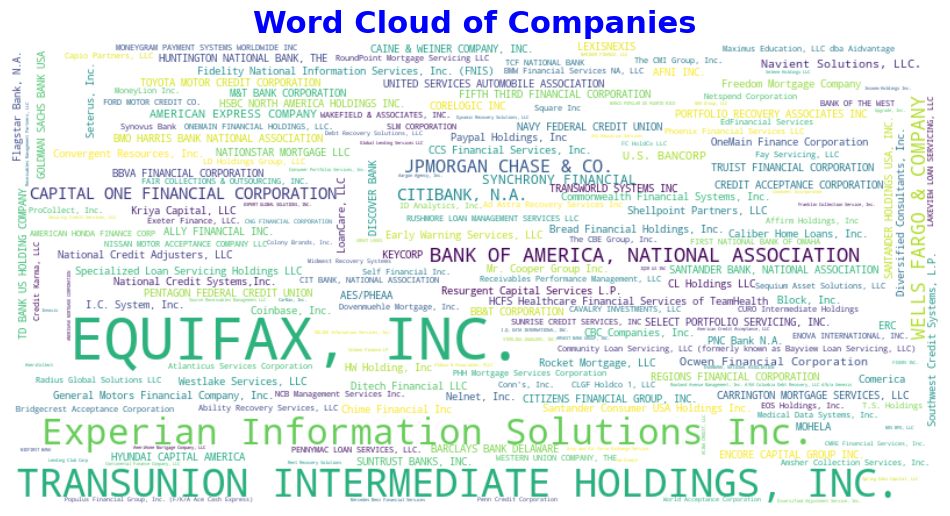

In [17]:
# Highlighted the top companies
# Count occurrences of each Company
Company_counts = data['Company'].value_counts()

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white')

# Create a dictionary with issue as key and count as value
wordcloud_dict = {}
for company, count in Company_counts.items():
    wordcloud_dict[company] = count

# Generate the word cloud
wordcloud.generate_from_frequencies(wordcloud_dict)

# Plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Companies', fontsize=22, fontweight='bold', color='blue')
plt.axis('off')
plt.show()

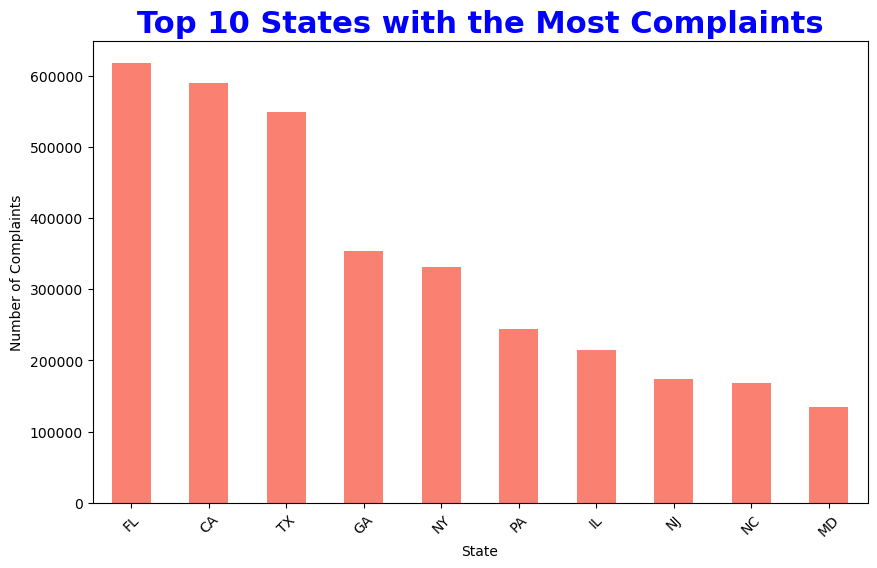

In [18]:
#Top 10 States with the Most Complaints
# Count complaints per state
complaints_per_state = data['State'].value_counts()

# Sort states based on number of complaints
sorted_states = complaints_per_state.sort_values(ascending=False)

# Select top 6 states
top_10_states = sorted_states.head(10)

# Plot bar graph
plt.figure(figsize=(10, 6))
top_10_states.plot(kind='bar', color='salmon')
plt.title('Top 10 States with the Most Complaints', fontsize=22, fontweight='bold', color='blue')
plt.xlabel('State')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.show()

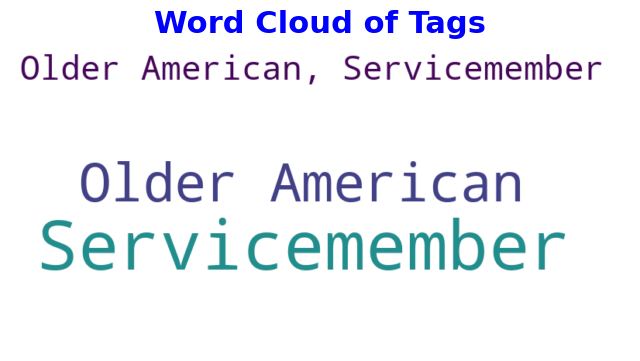

In [19]:
# Count occurrences of each Tags

Tags_counts = data['Tags'].value_counts()

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white')

# Create a dictionary with issue as key and count as value
wordcloud_dict = {}
for Tag, count in Tags_counts.items():
    wordcloud_dict[Tag] = count

# Generate the word cloud
wordcloud.generate_from_frequencies(wordcloud_dict)

# Plot the word cloud
plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Tags', fontsize=22, fontweight='bold', color='blue')
plt.axis('off')
plt.show()

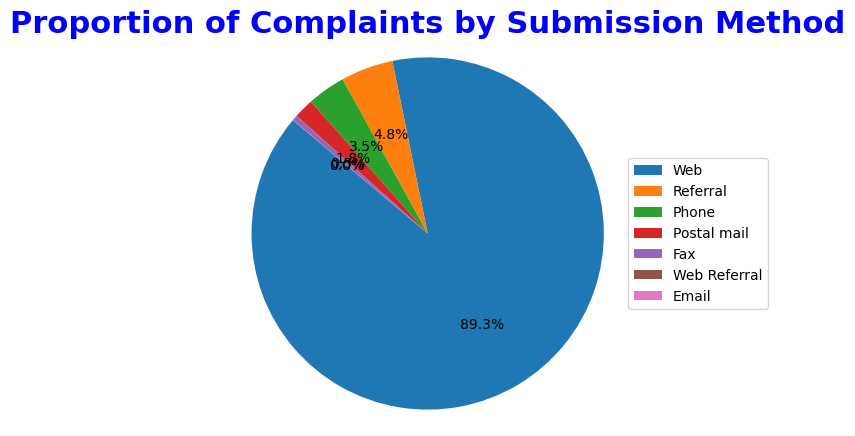

In [20]:
#Proportion of Complaints by Submission Method
# Count complaints
submitted_via_counts = data['Submitted via'].value_counts()

# percentage of complaints 
percentages = submitted_via_counts / submitted_via_counts.sum() * 100

# Plot pie chart
plt.figure(figsize=(5, 5))
plt.pie(percentages, labels=None, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title('Proportion of Complaints by Submission Method' , fontsize=22, fontweight='bold', color='blue')
plt.axis('equal') 

# legends
plt.legend(labels=percentages.index, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

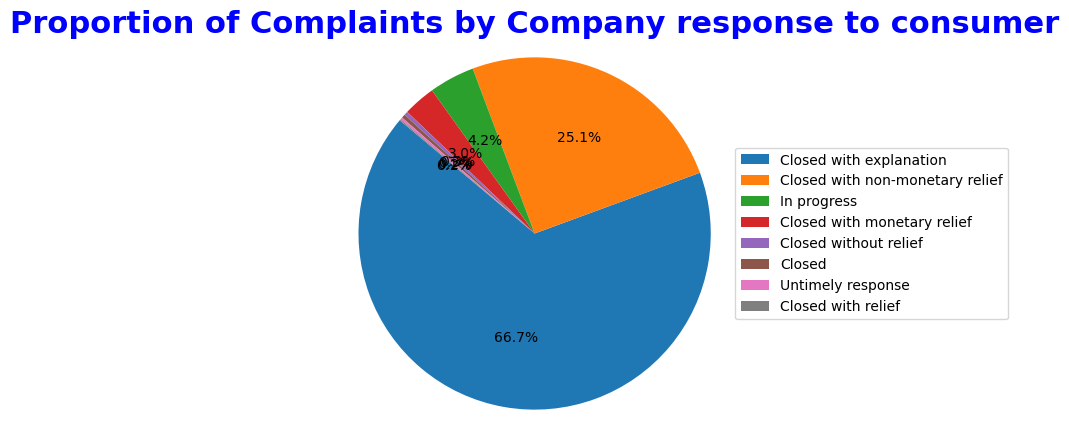

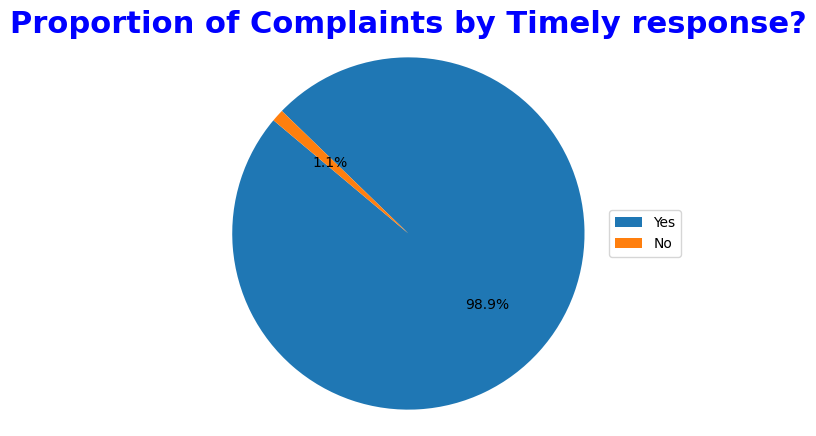

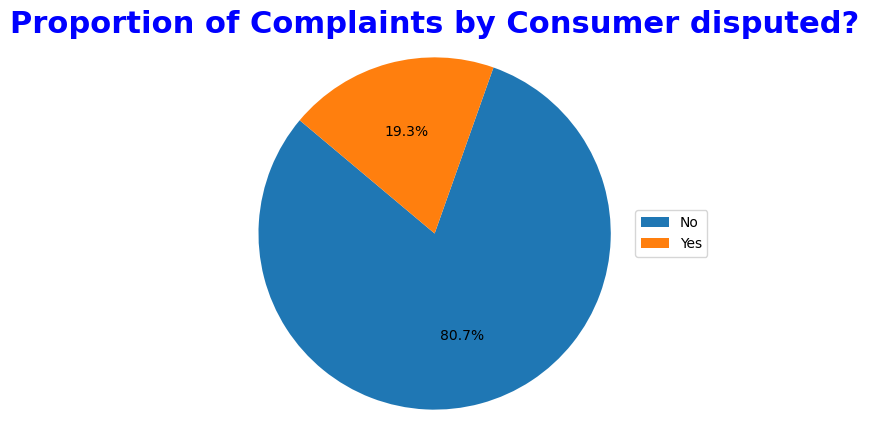

In [21]:
# Proportion  of Complaints by Company response to consumer, Timely response? and Consumer disputed

# List of columns
columns = ['Company response to consumer', 'Timely response?', 'Consumer disputed?']

# Loop through each column
for column in columns:
    # Count per category
    counts = data[column].value_counts()
    
    # percentage of complaints for each category
    percentages = counts / counts.sum() * 100
    
    # Plot pie chart
    plt.figure(figsize=(5, 5))
    plt.pie(percentages, labels=None, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
    plt.title(f'Proportion of Complaints by {column}', fontsize=22, fontweight='bold', color='blue')
    plt.axis('equal')
    
    # legend outside
    plt.legend(labels=percentages.index, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()


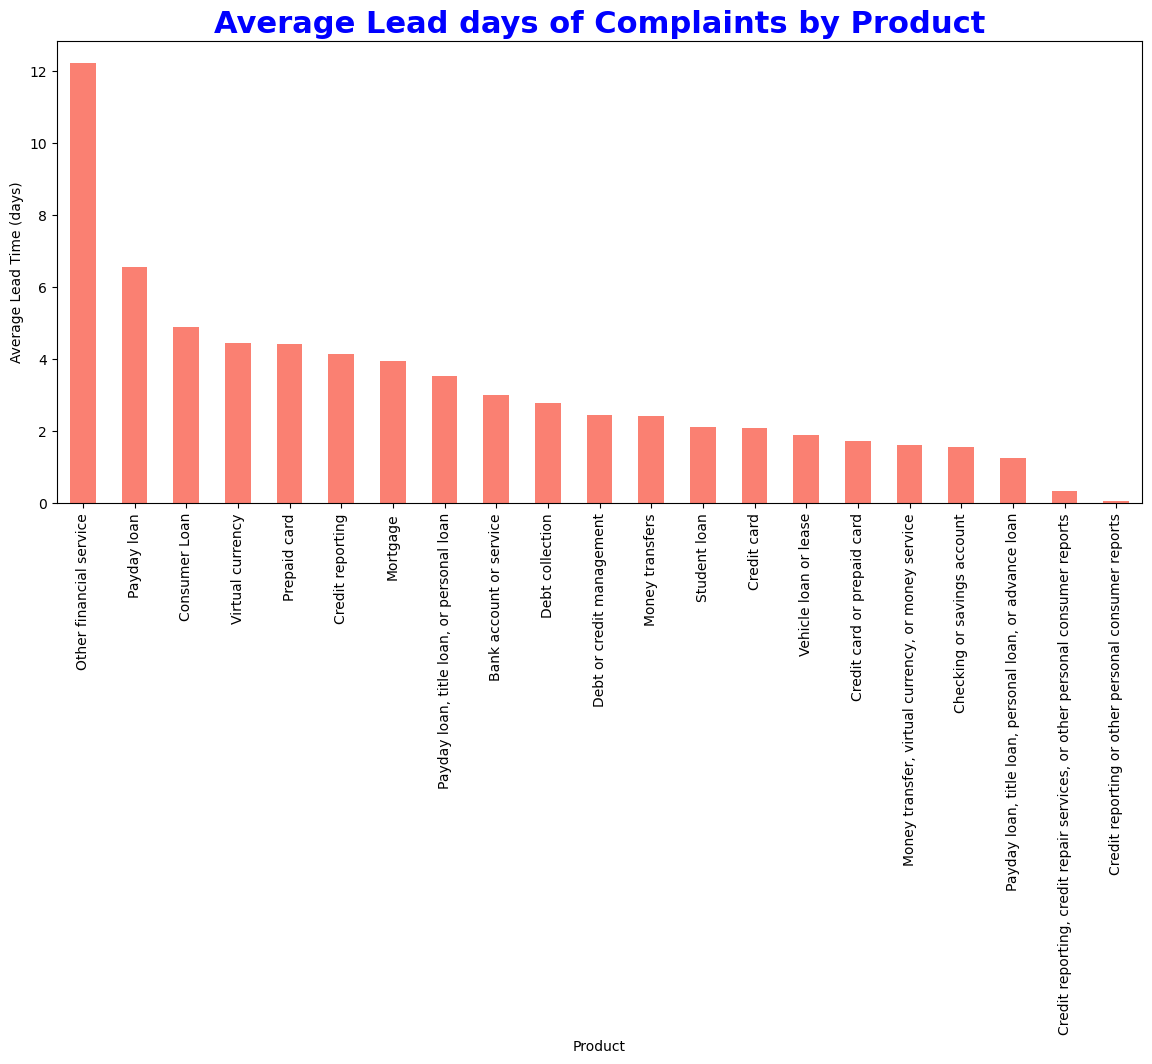

In [22]:
# Average Lead days of Complaints by Product

# Convert 'Start Date' and 'End Date' to datetime format
data['Date received'] = pd.to_datetime(data['Date received'])
data['Date sent to company'] = pd.to_datetime(data['Date sent to company'])

# Calculate lead time (End - start)
data['Lead Time'] = (data['Date sent to company'] - data['Date received']).dt.days

# Group by product and calculate average lead time
avg_lead_time_per_product = data.groupby('Product')['Lead Time'].mean().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(14, 6))
avg_lead_time_per_product.plot(kind='bar', color='salmon')
plt.title('Average Lead days of Complaints by Product', fontsize=22, fontweight='bold', color='blue')
plt.xlabel('Product')
plt.ylabel('Average Lead Time (days)')
plt.xticks(rotation=90)
plt.show()

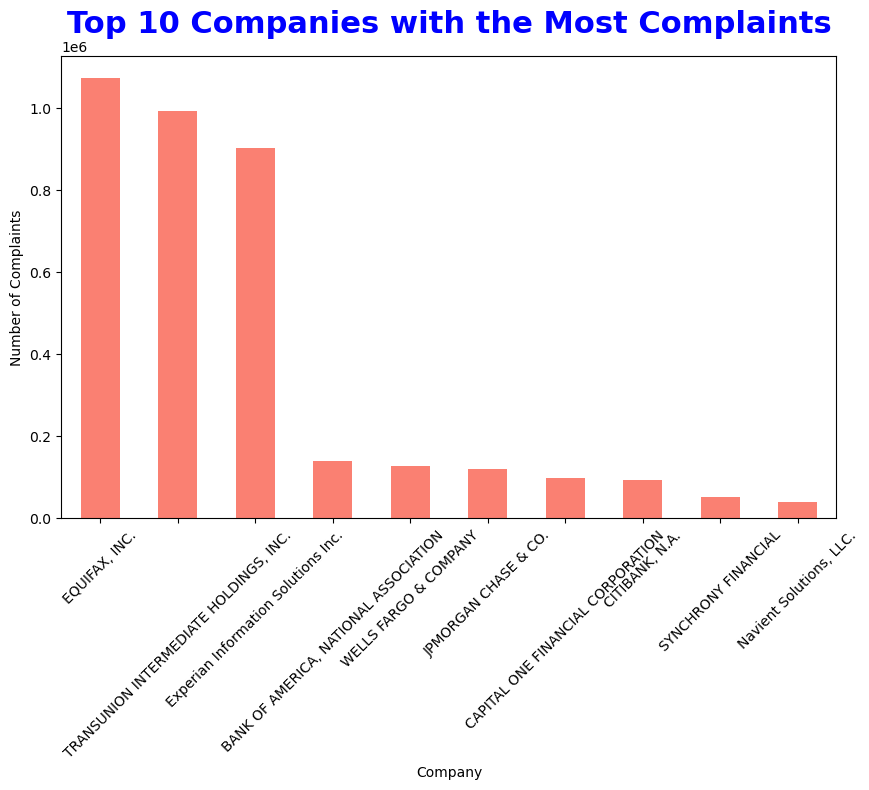

In [23]:
#Top 10 Companies with the Most Complaints(add threshold by SLA)
# Count complaints per company
complaints_per_company = data['Company'].value_counts()

# Sort companies based on number of complaints
sorted_companies = complaints_per_company.sort_values(ascending=False)

# Select top 10 companies
top_10_companies = sorted_companies.head(10)

# Plot bar graph
plt.figure(figsize=(10, 6))
top_10_companies.plot(kind='bar', color='salmon')
plt.title('Top 10 Companies with the Most Complaints', fontsize=22, fontweight='bold', color='blue')
plt.xlabel('Company')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.show()

2. Given an unsorted array of integers, find the length of the longest continuous increasing subsequence (subarray). 
Example 1:
Input: [1,3,5,4,7]
Output: 3 
Example 2:
Input: [2,2,2,2,2]
Output: 1

In [51]:
def len_of_long_conti_increasing_subarray(nums):
    if not nums:
        return 0

    max_length = 1
    current_length = 1

    for i in range(1, len(nums)):
        if nums[i] > nums[i - 1]:
            current_length += 1
            max_length = max(max_length, current_length)
        else:
            current_length = 1

    return max_length

In [52]:
Input1= [1,3,5,4,7] 
Input2= [2,2,2,2,2]

print(len_of_long_conti_increasing_subarray(Input1))
print(len_of_long_conti_increasing_subarray(Input2))

3
1


3. Given a list of non negative integers, arrange them such that they form the largest number.
 
 Example 1:
 Input: [10,2]
 Output: "210"
 Example 2:
 
 Input: [3,30,34,5,9]
 Output: "9534330"

In [53]:
def largest_num(nums):
    nums = [str(num) for num in nums]
    nums.sort(key=lambda x: x * 3, reverse=True)
    largest_num = ''.join(nums)
    largest_num = largest_num.lstrip('0')

    # If the resulting string is empty, it means all numbers were zeros
    return largest_num or '0'

In [54]:
nums1 = [10, 2]
print(largest_num(nums1))

nums2 = [3, 30, 34, 5, 9]
print(largest_num(nums2)) 

210
9534330


4. Store all the "servlet-name", and "servlet-class" to a csv file from the attached sample_json.json file using Python.

In [55]:
import json
import csv

# Read the JSON file
with open(r"C:\Users\91879\Downloads\DT A1 sample_json.json") as json_file:
    data = json.load(json_file)
data

{'web-app': {'servlet': [{'servlet-name': 'cofaxCDS',
    'servlet-class': 'org.cofax.cds.CDSServlet',
    'init-param': {'configGlossary:installationAt': 'Philadelphia, PA',
     'configGlossary:adminEmail': 'ksm@pobox.com',
     'configGlossary:poweredBy': 'Cofax',
     'configGlossary:poweredByIcon': '/images/cofax.gif',
     'configGlossary:staticPath': '/content/static',
     'templateProcessorClass': 'org.cofax.WysiwygTemplate',
     'templateLoaderClass': 'org.cofax.FilesTemplateLoader',
     'templatePath': 'templates',
     'templateOverridePath': '',
     'defaultListTemplate': 'listTemplate.htm',
     'defaultFileTemplate': 'articleTemplate.htm',
     'useJSP': 'false',
     'jspListTemplate': 'listTemplate.jsp',
     'jspFileTemplate': 'articleTemplate.jsp',
     'cachePackageTagsTrack': 200,
     'cachePackageTagsStore': 200,
     'cachePackageTagsRefresh': 60,
     'cacheTemplatesTrack': 100,
     'cacheTemplatesStore': 50,
     'cacheTemplatesRefresh': 15,
     'cachePag

In [56]:
# Extract "servlet-name" and "servlet-class" from each object
servlet_data = [(servlet['servlet-name'], servlet['servlet-class']) for servlet in data['web-app']['servlet']]
servlet_data

[('cofaxCDS', 'org.cofax.cds.CDSServlet'),
 ('cofaxEmail', 'org.cofax.cds.EmailServlet'),
 ('cofaxAdmin', 'org.cofax.cds.AdminServlet'),
 ('fileServlet', 'org.cofax.cds.FileServlet'),
 ('cofaxTools', 'org.cofax.cms.CofaxToolsServlet')]

In [57]:
# Extracted data to a CSV file
with open('servlet_data.csv', 'w', newline='') as csvfile:
    fieldnames = ['servlet-name', 'servlet-class']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for servlet in servlet_data:
        writer.writerow({'servlet-name': servlet[0], 'servlet-class': servlet[1]})

In [58]:
# load Extracted data
data_set = pd.read_csv("servlet_data.csv")
data_set

,servlet-name,servlet-class
0,cofaxCDS,org.cofax.cds.CDSServlet
1,cofaxEmail,org.cofax.cds.EmailServlet
2,cofaxAdmin,org.cofax.cds.AdminServlet
3,fileServlet,org.cofax.cds.FileServlet
4,cofaxTools,org.cofax.cms.CofaxToolsServlet
